In [1]:
#univariate analysis

In [2]:
#import the library 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import ttest_ind

In [3]:
#loading the preprocessed data 
dataset=pd.read_csv("Water_cleaned.csv")

In [4]:
dataset.shape

(100, 9)

In [5]:
row=dataset.shape[0]
column=dataset.shape[1]
print(f"Total number of rows:{row}\nTotal number of columns:{column}")

Total number of rows:100
Total number of columns:9


In [6]:
#Identify quantitative(numerical) and qualitative(categorical) columns
def quanqual(df):
    quan=[]
    qual=[]
    for i in df.columns:
        if df[i].nunique()<=5:
            qual.append(i)
        else:
            quan.append(i)
    return quan,qual

In [7]:
quan,qual=quanqual(dataset)

In [8]:
print(f"Numerical variables:{quan}\nCategorical variables:{qual}")

Numerical variables:['Household_ID', 'Daily_Water_Consumption_Liters', 'Temperature_C', 'Humidity_percent', 'drinking_water_ use _Liters ', 'Appliance_Usage_Water_Liters']
Categorical variables:['members ', 'water source  type', 'Day_type']


In [9]:
#descriptive statistics
def Univariate(df,quan):
    descriptive=pd.DataFrame(index=["Mean","Median","Mode","Q1:25%","Q2:50%","Q3:75%","99%","Q4:100%","IQR","1.5rule","Lower_Bound","Upper_Bound","Min","Max","Skew","Kurtosis","Variance","Standard_Deviation"],columns=quan)
    for columnName in quan:
        descriptive.loc["Mean",columnName]=df[columnName].mean()
        descriptive.loc["Median",columnName]=df[columnName].median()
        descriptive.loc["Mode",columnName]=df[columnName].mode()[0]
        descriptive.loc["Q1:25%",columnName]=np.percentile(df[columnName],25)
        descriptive.loc["Q2:50%",columnName]=np.percentile(df[columnName],50)
        descriptive.loc["Q3:75%",columnName]=np.percentile(df[columnName],75)
        descriptive.loc["99%",columnName]=np.percentile(df[columnName],99)
        descriptive.loc["Q4:100%",columnName]=np.percentile(df[columnName],100)
        descriptive.loc["IQR",columnName]=descriptive.loc["Q3:75%",columnName]-descriptive.loc["Q1:25%",columnName]
        descriptive.loc["1.5rule",columnName]=1.5*descriptive.loc["IQR",columnName]
        descriptive.loc["Lower_Bound",columnName]= descriptive.loc["Q1:25%",columnName]-descriptive.loc["1.5rule",columnName]
        descriptive.loc["Upper_Bound",columnName]= descriptive.loc["Q3:75%",columnName]+descriptive.loc["1.5rule",columnName]
        descriptive.loc["Min",columnName]=df[columnName].min()
        descriptive.loc["Max",columnName]=df[columnName].max()
        descriptive.loc["Skew", columnName] = df[columnName].skew()
        descriptive.loc["Kurtosis", columnName] = df[columnName].kurtosis()
        descriptive.loc["Variance", columnName] = df[columnName].var()
        descriptive.loc["Standard_Deviation", columnName] = df[columnName].std()
    return descriptive

In [10]:
descriptive_stats = Univariate(dataset,quan)
print("Descriptive_Statistics:\n",descriptive_stats)

Descriptive_Statistics:
                    Household_ID Daily_Water_Consumption_Liters Temperature_C  \
Mean                       50.5                          576.7        28.753   
Median                     50.5                          575.0         28.75   
Mode                          1                            520          23.9   
Q1:25%                    25.75                          480.0        26.775   
Q2:50%                     50.5                          575.0         28.75   
Q3:75%                    75.25                          692.5        30.725   
99%                       99.01                          850.1        34.701   
Q4:100%                   100.0                          860.0          34.8   
IQR                        49.5                          212.5          3.95   
1.5rule                   74.25                         318.75         5.925   
Lower_Bound               -48.5                         161.25         20.85   
Upper_Bound    

In [11]:
def finding_outlier(descriptive_stats,quan):
    lower_outlier=[]
    upper_outlier=[]
    for columnName in quan:
        if (descriptive_stats[columnName]['Min']<descriptive_stats[columnName]['Lower_Bound']):
            lower_outlier.append(columnName)
        if (descriptive_stats[columnName]['Max']>descriptive_stats[columnName]['Upper_Bound']):
            upper_outlier.append(columnName)
    return lower_outlier,upper_outlier
    

In [12]:
lower_outlier,upper_outlier=finding_outlier(descriptive_stats,quan)

In [13]:
print(f"Lower Outliers:{lower_outlier}")
print(f"Upper Outliers:{upper_outlier}")

Lower Outliers:[]
Upper Outliers:[]


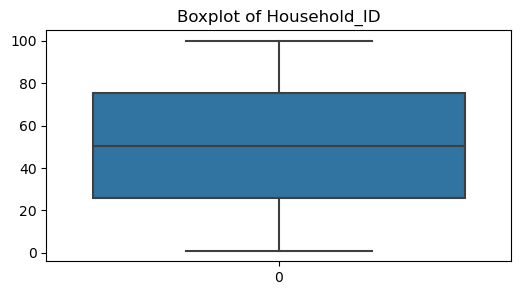

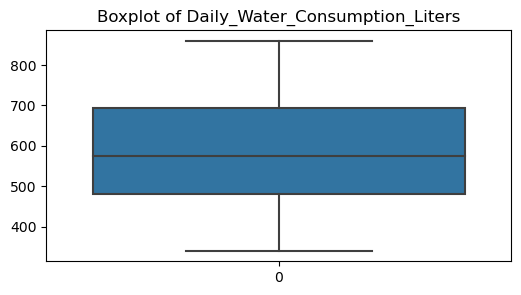

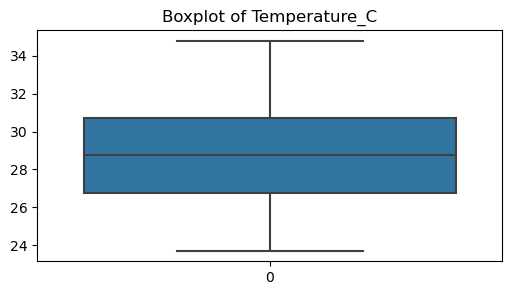

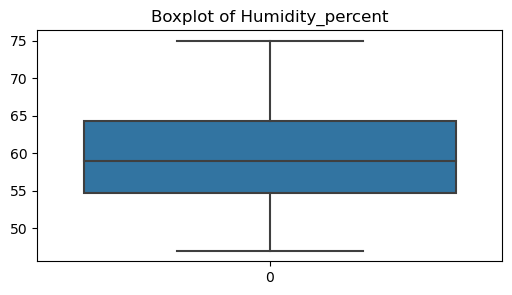

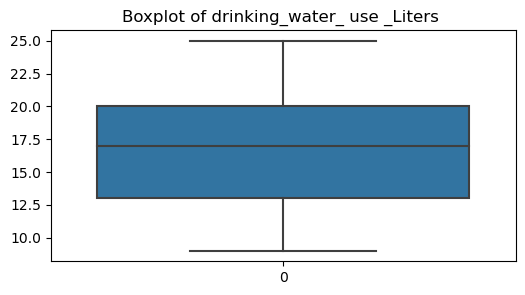

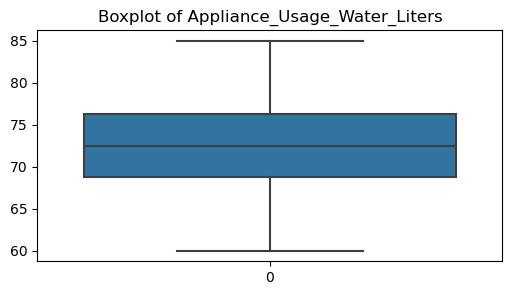

In [14]:
for column in quan:
    plt.figure(figsize=(6,3))
    sns.boxplot(dataset[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

In [15]:
# no outlier   for household_id

In [16]:
def replacing_outlier(descriptive_stats,df,lower_outlier,upper_outlier):
    for columnName in lower_outlier:
        df.loc[df[columnName]<descriptive_stats[columnName]['Lower_Bound'],columnName]=descriptive_stats[columnName]['Lower_Bound']
    for columnName in upper_outlier:
        df.loc[df[columnName]>descriptive_stats[columnName]['Upper_Bound'],columnName]=descriptive_stats[columnName]['Upper_Bound']
    return df

In [17]:
dataset=replacing_outlier(descriptive_stats,dataset,lower_outlier,upper_outlier)
descriptive=Univariate(dataset,quan)

In [18]:
descriptive

,Household_ID,Daily_Water_Consumption_Liters,Temperature_C,Humidity_percent,drinking_water_ use _Liters,Appliance_Usage_Water_Liters
Mean,50.5,576.7,28.753,59.41,16.52,72.5
Median,50.5,575.0,28.75,59.0,17.0,72.5
Mode,1,520,23.9,60,18,70
Q1:25%,25.75,480.0,26.775,54.75,13.0,68.75
Q2:50%,50.5,575.0,28.75,59.0,17.0,72.5
Q3:75%,75.25,692.5,30.725,64.25,20.0,76.25
99%,99.01,850.1,34.701,74.01,24.01,85.0
Q4:100%,100.0,860.0,34.8,75.0,25.0,85.0
IQR,49.5,212.5,3.95,9.5,7.0,7.5
1.5rule,74.25,318.75,5.925,14.25,10.5,11.25


In [19]:
lower_outlier,upper_outlier=finding_outlier(descriptive,quan)

In [20]:
lower_outlier  #  no outlier

[]

In [21]:
upper_outlier  # no outlier

[]

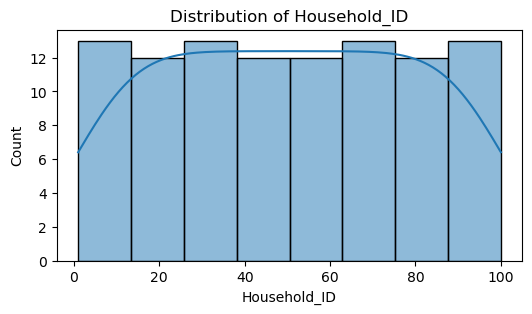

In [22]:
plt.figure(figsize=(6,3))
sns.histplot(dataset["Household_ID"], kde=True)
plt.title(f"Distribution of Household_ID")
plt.show()

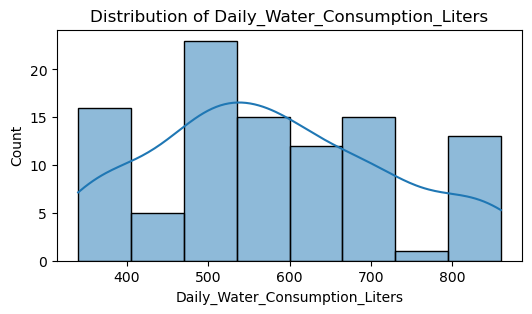

In [23]:
plt.figure(figsize=(6,3))
sns.histplot(dataset["Daily_Water_Consumption_Liters"], kde=True)
plt.title(f"Distribution of Daily_Water_Consumption_Liters")
plt.show()

In [24]:
#univariate analysis
#1: What is the distribution of daily water consumption (liters) across households?
    
    

In [25]:
daily = dataset['Daily_Water_Consumption_Liters']
print(daily.describe())
print("Mode:", daily.mode().iloc[0])

count    100.000000
mean     576.700000
std      145.533189
min      340.000000
25%      480.000000
50%      575.000000
75%      692.500000
max      860.000000
Name: Daily_Water_Consumption_Liters, dtype: float64
Mode: 520


In [26]:
#The daily water consumption ranges from 340 L to 860 L (mean ≈576.7 L, median 575 L, mode 520 L). The distribution is roughly symmetric with a slight right tail (skew ≈+0.26). About 50% of values lie between 480 L (Q1) and 692.5 L (Q3).

In [27]:
#2: What is the distribution of recorded temperatures (°C)?

In [28]:
temp = dataset['Temperature_C']
print(temp.describe())
print("Mode (approx):", temp.mode().iloc[0])



count    100.000000
mean      28.753000
std        2.938235
min       23.700000
25%       26.775000
50%       28.750000
75%       30.725000
max       34.800000
Name: Temperature_C, dtype: float64
Mode (approx): 23.9


In [29]:
#Temperature values range from ~23.9 °C to 31.4 °C (mean ≈28.75 °C, median 27.0 °C, mode ≈23.9 °C)

In [30]:
#3.What is the distribution of humidity (% relative humidity)?

In [31]:
hum = dataset['Humidity_percent']
print(hum.describe())

count    100.000000
mean      59.410000
std        7.261487
min       47.000000
25%       54.750000
50%       59.000000
75%       64.250000
max       75.000000
Name: Humidity_percent, dtype: float64


In [32]:
#Humidity percentages range from 47% to 72% (mean ≈57.79%, median 58%, mode #55%).

In [33]:
#4.What is the distribution of water used by appliances (liters)


In [34]:
app = dataset['Appliance_Usage_Water_Liters']
print(app.describe())

count    100.000000
mean      72.500000
std        7.470481
min       60.000000
25%       68.750000
50%       72.500000
75%       76.250000
max       85.000000
Name: Appliance_Usage_Water_Liters, dtype: float64


In [35]:
#Appliance water use spans 40 L to 100 L per day (mean ≈70.45 L, median 75 L)

In [36]:
#6.How are households distributed by water source type


In [37]:
print(dataset['water source  type'].value_counts())

water source  type
Municipal    41
Borewell     31
Tanker       28
Name: count, dtype: int64


In [38]:
#water source type Municipal-41 Borewell-31 Tanker-28   municipal is highest 

In [39]:
#Bivariate Analysis




In [40]:
#1.How are the numeric variables intercorrelated?

                                Household_ID  members   \
Household_ID                           1.000     0.016   
members                                0.016     1.000   
Daily_Water_Consumption_Liters         0.050     0.987   
Temperature_C                          0.090     0.959   
Humidity_percent                       0.180     0.944   
drinking_water_ use _Liters            0.132     0.960   
Appliance_Usage_Water_Liters           0.015     0.121   

                                Daily_Water_Consumption_Liters  Temperature_C  \
Household_ID                                             0.050          0.090   
members                                                  0.987          0.959   
Daily_Water_Consumption_Liters                           1.000          0.978   
Temperature_C                                            0.978          1.000   
Humidity_percent                                         0.965          0.971   
drinking_water_ use _Liters                      

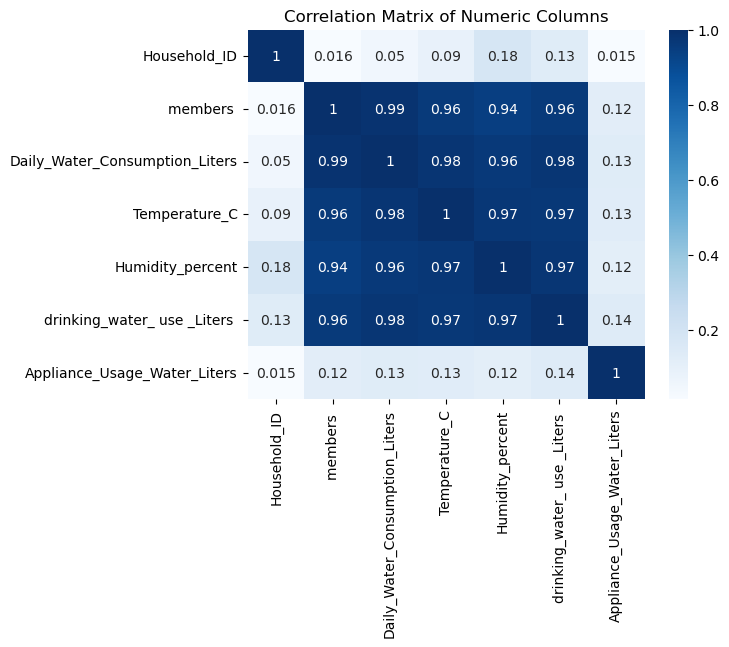

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = dataset.select_dtypes(include=['int64','float64']).columns
corr = dataset[numeric_cols].corr()

print(corr.round(3))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Correlation Matrix of Numeric Columns")
plt.show()


In [43]:
#2.How does temperature relate to water consumption

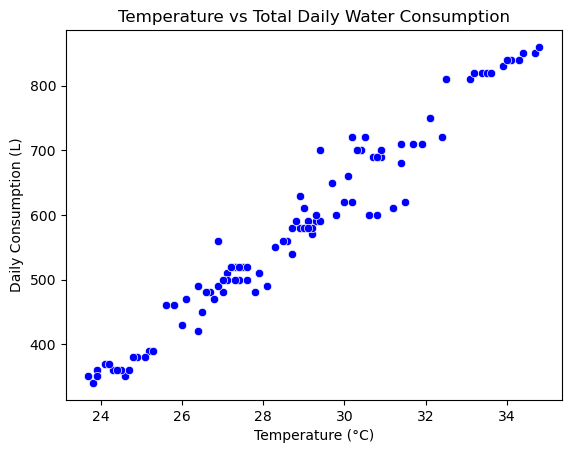

Correlation: 0.9784103119189952


In [50]:
# Scatter plot of Temperature vs Daily consumption
sns.scatterplot(x='Temperature_C', y='Daily_Water_Consumption_Liters', data=dataset, color='blue')
plt.title("Temperature vs Total Daily Water Consumption")
plt.xlabel("Temperature (°C)")
plt.ylabel("Daily Consumption (L)")
plt.show()
print("Correlation:", dataset['Temperature_C'].corr(dataset['Daily_Water_Consumption_Liters']))



In [51]:
# based on the graph i observed positive correlation
# Higher outdoor temperature is associated with higher water consumption

In [52]:
#3.How does humidity relate to water consumption?

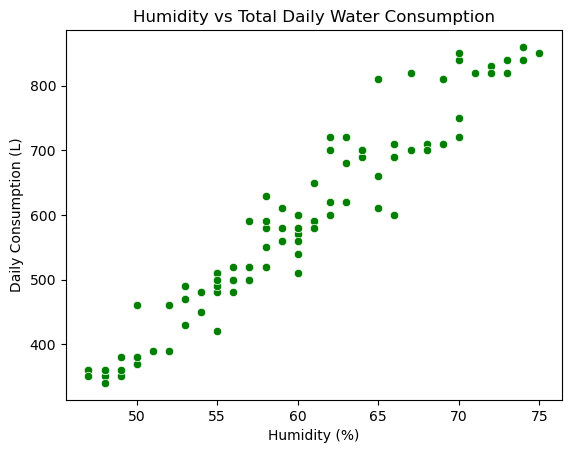

Correlation: 0.9647622014499251


In [53]:
# Scatter plot of Humidity vs Daily consumption
sns.scatterplot(x='Humidity_percent', y='Daily_Water_Consumption_Liters', data=dataset, color='green')
plt.title("Humidity vs Total Daily Water Consumption")
plt.xlabel("Humidity (%)")
plt.ylabel("Daily Consumption (L)")
plt.show()
print("Correlation:", dataset['Humidity_percent'].corr(dataset['Daily_Water_Consumption_Liters']))


In [54]:
# based on the graph i observed positive correlation
# Similarly, humidity has a very high positive correlation (≈+0.965) with total consumption

In [55]:
#4.Is water consumption different on weekends vs weekdays?


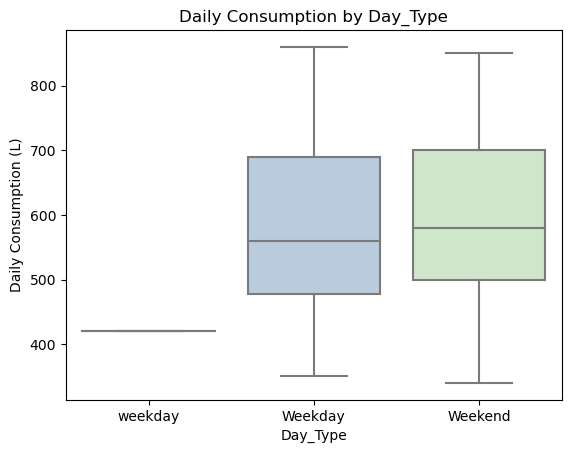

Day_type
Weekday    571.153846
Weekend    586.170213
weekday    420.000000
Name: Daily_Water_Consumption_Liters, dtype: float64


In [57]:
# Box plot of Daily consumption by Day_type
sns.boxplot(x='Day_type', y='Daily_Water_Consumption_Liters', data=dataset, palette='Pastel1')
plt.title("Daily Consumption by Day_Type")
plt.xlabel("Day_Type")
plt.ylabel("Daily Consumption (L)")
plt.show()
print(dataset.groupby('Day_type')['Daily_Water_Consumption_Liters'].mean())


In [58]:
#observe the graph weekend consume water high 


In [59]:
#5.Does water source type affect consumption?

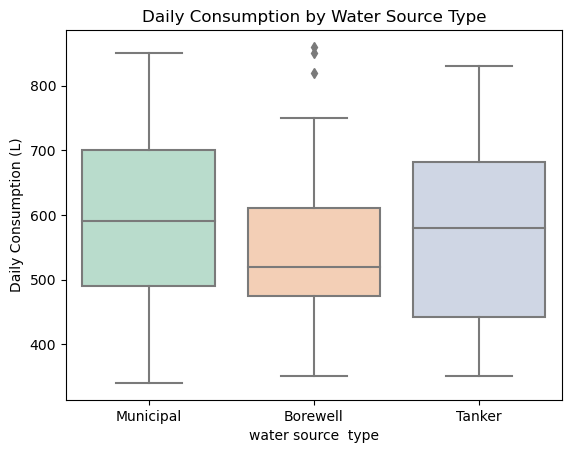

water source  type
Borewell     552.9
Municipal    598.5
Tanker       571.1
Name: Daily_Water_Consumption_Liters, dtype: float64


In [60]:
# Box plot of Daily consumption by Water Source Type
sns.boxplot(x='water source  type', y='Daily_Water_Consumption_Liters', data=dataset, palette='Pastel2')
plt.title("Daily Consumption by Water Source Type")
plt.xlabel("water source  type")
plt.ylabel("Daily Consumption (L)")
plt.show()
print(dataset.groupby('water source  type')['Daily_Water_Consumption_Liters'].mean().round(1))


In [61]:
#  based on graph here are differences by source type. Municipal customers have the highest average consumption (~598.5 L), Tanker next (~571.1 L), and Borewell the lowest (~552.9 L).   This might reflect unlimited supply or socioeconomic factors.

In [67]:
# Save the cleaned DataFrame
dataset.to_csv("Water_cleaned_final.csv", index=False)